![Kidney Disease Analysis](kidney_analysis.jpeg)

## Import library

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score

import warnings as wn
wn.filterwarnings(action='ignore')

## Data import

In [2]:
df=pd.read_csv("C://Users//Admin//Documents//Guvi//MDTM38//project//Disease_pre//kidney//kidney_disease.csv")
pd.set_option("display.max_columns", None)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


## Data cleaning

In [4]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.drop("id", axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [7]:
df.shape

(400, 25)

In [8]:
df[["pcv"]].value_counts()

pcv
52     21
41     21
48     19
44     19
40     16
43     15
45     13
42     13
32     12
36     12
50     12
28     12
33     12
37     11
34     11
46      9
35      9
29      9
30      9
31      8
24      7
39      7
26      6
38      5
51      4
47      4
54      4
53      4
49      4
22      3
25      3
27      3
19      2
23      2
9       1
14      1
15      1
21      1
20      1
18      1
17      1
16      1
?       1
Name: count, dtype: int64

In [9]:
df[["wc"]].value_counts()

wc   
9800     11
6700     10
9200      9
9600      9
7200      9
         ..
2600      1
26400     1
4100      1
4900      1
?         1
Name: count, Length: 90, dtype: int64

In [10]:
df[["rc"]].value_counts()

rc 
5.2    18
4.5    16
4.9    14
4.7    11
5      10
4.8    10
3.9    10
3.4     9
4.6     9
5.9     8
5.5     8
6.1     8
3.7     8
5.4     7
5.3     7
3.8     7
5.8     7
4.3     6
4.2     6
5.6     6
4       6
4.1     5
4.4     5
5.7     5
6.2     5
6.4     5
5.1     5
6.5     5
3.2     5
3.6     4
6.3     4
6       4
3       3
3.5     3
3.3     3
2.1     2
3.1     2
2.9     2
2.8     2
2.7     2
2.6     2
2.5     2
2.3     1
2.4     1
8       1
?       1
Name: count, dtype: int64

In [11]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [12]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
df.describe(include="all")

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,201,259,354,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251,261,364,317,323,339,250
mean,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df[df["age"] == 2]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
215,2.0,NaN,1.01,3.0,0.0,normal,abnormal,notpresent,notpresent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,good,yes,no,ckd


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

### Missing value

In [16]:
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns
numerical_cols

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [17]:
category_cols=df.select_dtypes(include="object").columns
category_cols

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [18]:
df[numerical_cols]=df[numerical_cols].fillna(df[numerical_cols].median())
df[category_cols]=df[category_cols].fillna(df[category_cols].mode().iloc[0])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [19]:
df.describe(include="all")

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.00000,400.000000,400,400,400,400,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400,400,400,400,400,400,400
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,353,324,358,378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253,263,366,318,324,340,250
mean,51.562500,76.575000,1.017712,0.90000,0.395000,NaN,NaN,NaN,NaN,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,16.982996,13.489785,0.005434,1.31313,1.040038,NaN,NaN,NaN,NaN,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,1.005000,0.00000,0.000000,NaN,NaN,NaN,NaN,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,1.015000,0.00000,0.000000,NaN,NaN,NaN,NaN,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,1.020000,0.00000,0.000000,NaN,NaN,NaN,NaN,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.000000,80.000000,1.020000,2.00000,0.000000,NaN,NaN,NaN,NaN,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [21]:
assert pd.notnull(df).all().all()

In [22]:
assert pd.notnull(df.select_dtypes(include=["number"])).all().all()

In [23]:
assert (df.select_dtypes(include=['number']) >= 0).all().all()

In [24]:
print(df.duplicated().sum())

0


## EDA

In [25]:
print(df["classification"].value_counts()) ## imbalanced data so go for precision, recall and f1 score

classification
ckd       250
notckd    150
Name: count, dtype: int64


Text(0.5, 1.0, 'Chronic Kidney Disease-classification')

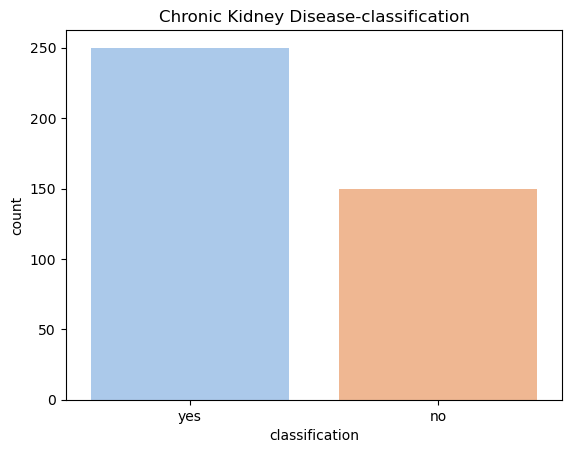

In [26]:
ax = sns.countplot(data=df, x="classification", palette="pastel")
ax.set_xticklabels(["yes", "no"])
plt.title("Chronic Kidney Disease-classification")

### Univariate analysis

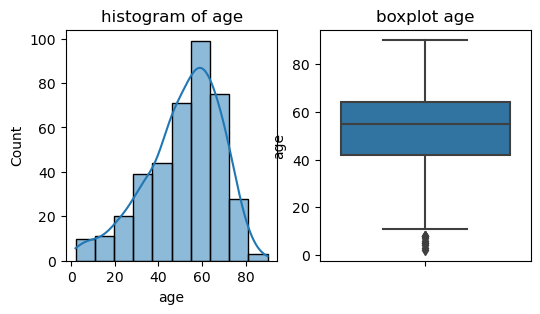

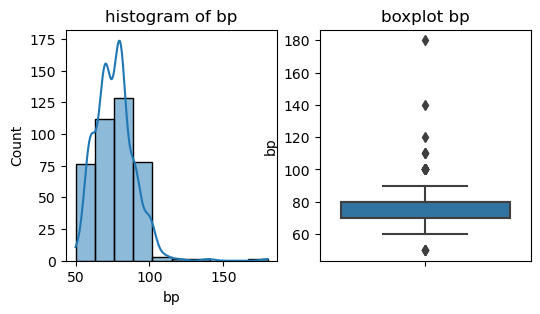

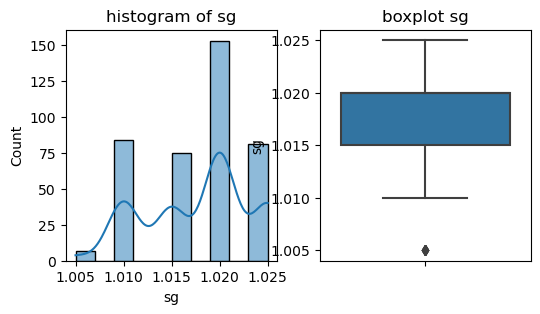

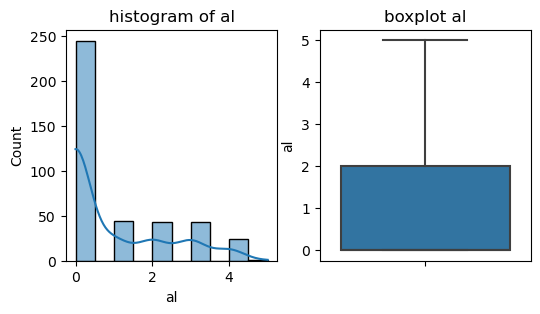

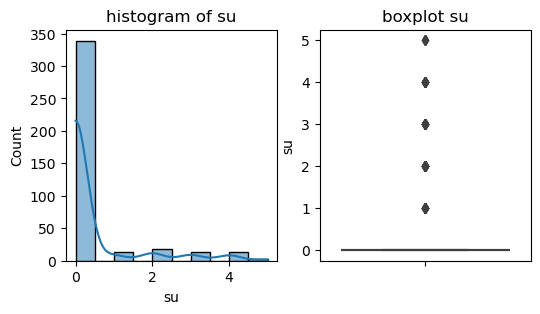

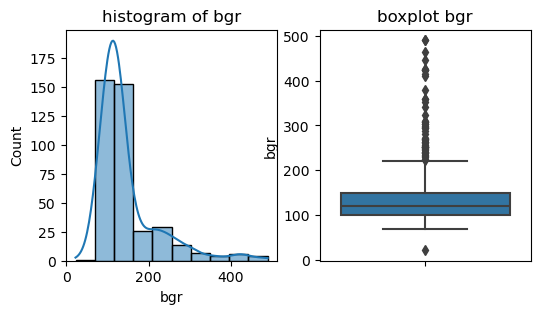

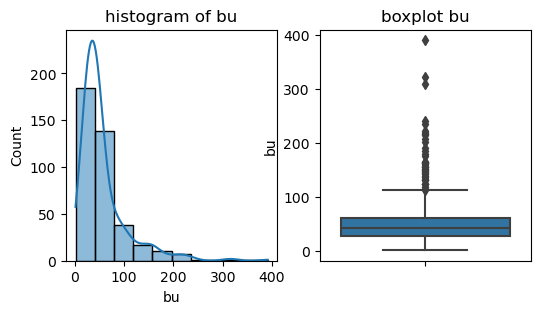

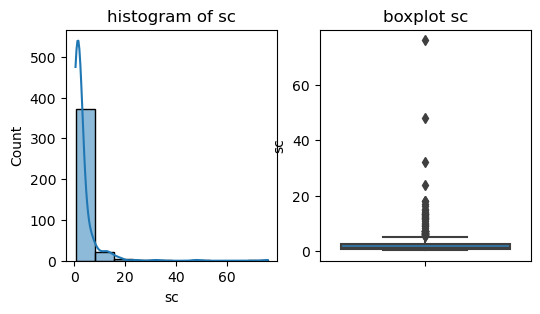

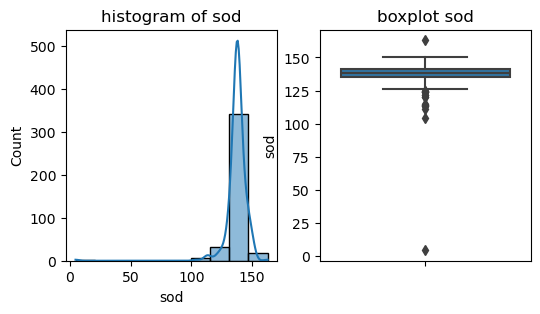

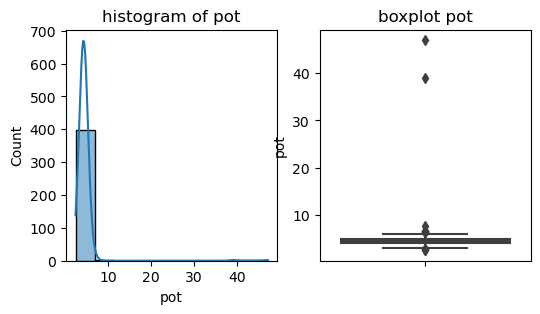

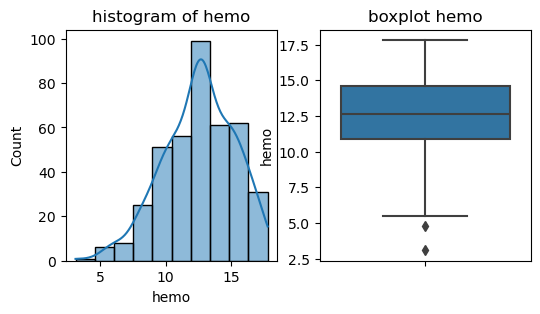

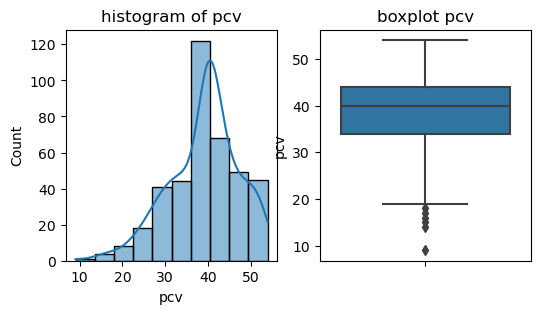

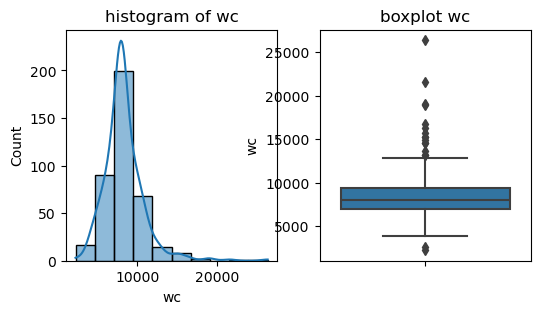

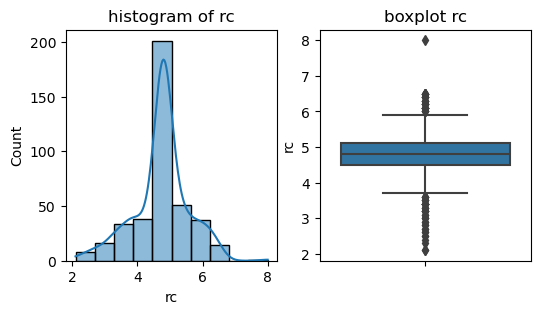

In [27]:
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"histogram of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col])
    plt.title(f"boxplot {col}")
    plt.show()

### Bivariate analysis

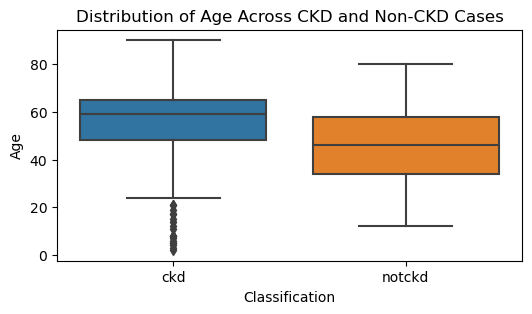

In [28]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='classification', y='age', data=df)
plt.title('Distribution of Age Across CKD and Non-CKD Cases')
plt.xlabel('Classification')
plt.ylabel('Age')
plt.show()


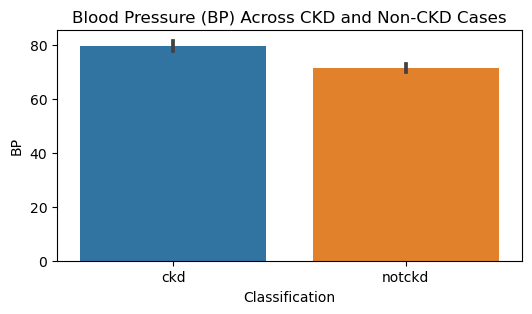

In [29]:
plt.figure(figsize=(6, 3))
sns.barplot(x='classification', y='bp', data=df)
plt.title("Blood Pressure (BP) Across CKD and Non-CKD Cases")
plt.xlabel('Classification')
plt.ylabel('BP')
plt.show()

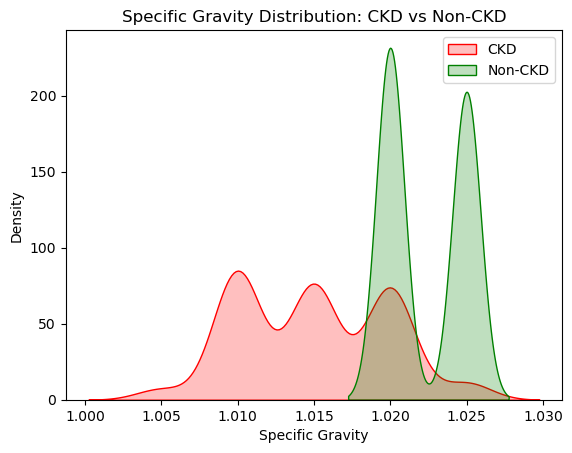

In [30]:
sns.kdeplot(df[df["classification"] == "ckd"]["sg"], shade=True, color="red", label="CKD")
sns.kdeplot(df[df["classification"] == "notckd"]["sg"], shade=True, color="green", label="Non-CKD")

# Labels and title
plt.title("Specific Gravity Distribution: CKD vs Non-CKD")
plt.xlabel("Specific Gravity")
plt.ylabel("Density")
plt.legend()

plt.show()

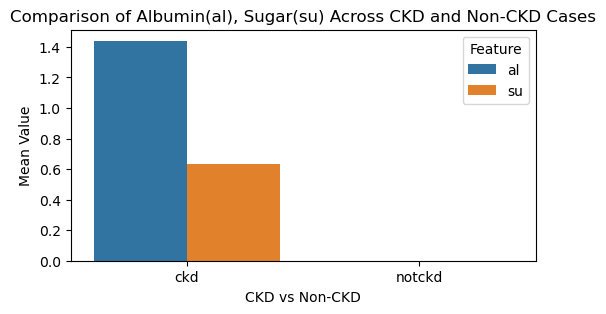

In [31]:
grouped_df = df.groupby("classification")[["al", "su"]].mean().reset_index()

# Melting the dataframe for easier plotting
melted_df = pd.melt(grouped_df, id_vars=["classification"], var_name="Feature", value_name="Mean Value")

# Plot the grouped bar chart
plt.figure(figsize=(6, 3))
sns.barplot(x="classification", y="Mean Value", hue="Feature", data=melted_df)

# Titles and labels
plt.title("Comparison of Albumin(al), Sugar(su) Across CKD and Non-CKD Cases")
plt.xlabel("CKD vs Non-CKD")
plt.ylabel("Mean Value")
plt.legend(title="Feature")

# Show the plot
plt.show()

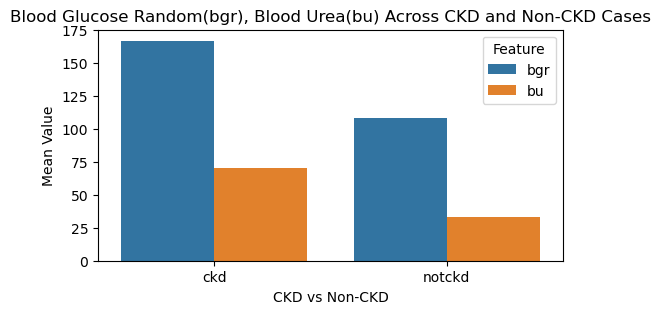

In [32]:
grouped_df = df.groupby("classification")[["bgr", "bu"]].mean().reset_index()

# Melting the dataframe for easier plotting
melted_df = pd.melt(grouped_df, id_vars=["classification"], var_name="Feature", value_name="Mean Value")

# Plot the grouped bar chart
plt.figure(figsize=(6, 3))
sns.barplot(x="classification", y="Mean Value", hue="Feature", data=melted_df)

# Titles and labels
plt.title("Blood Glucose Random(bgr), Blood Urea(bu) Across CKD and Non-CKD Cases")
plt.xlabel("CKD vs Non-CKD")
plt.ylabel("Mean Value")
plt.legend(title="Feature")

# Show the plot
plt.show()

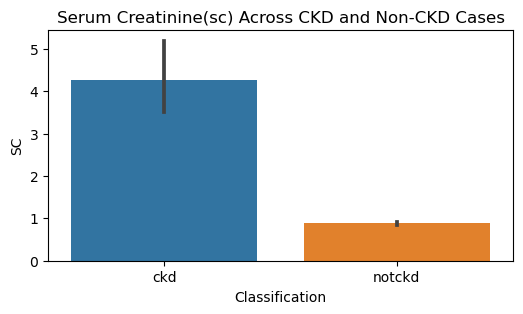

In [33]:
plt.figure(figsize=(6, 3))
sns.barplot(x='classification', y='sc', data=df)
plt.title("Serum Creatinine(sc) Across CKD and Non-CKD Cases")
plt.xlabel('Classification')
plt.ylabel('SC')
plt.show()

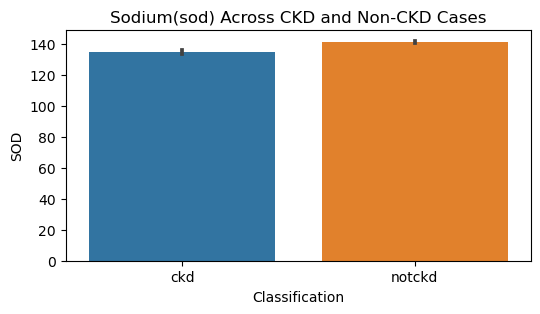

In [34]:
plt.figure(figsize=(6, 3))
sns.barplot(x='classification', y='sod', data=df)
plt.title("Sodium(sod) Across CKD and Non-CKD Cases")
plt.xlabel('Classification')
plt.ylabel('SOD')
plt.show()

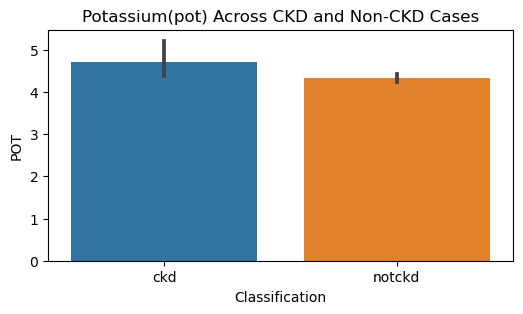

In [35]:
plt.figure(figsize=(6, 3))
sns.barplot(x='classification', y='pot', data=df)
plt.title("Potassium(pot) Across CKD and Non-CKD Cases")
plt.xlabel('Classification')
plt.ylabel('POT')
plt.show()

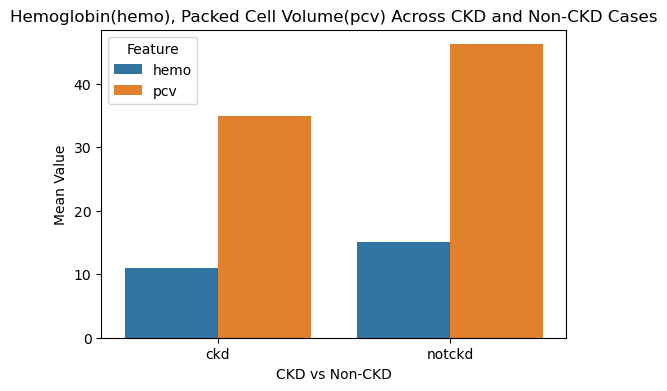

In [36]:
grouped_df = df.groupby("classification")[["hemo", "pcv"]].mean().reset_index()

# Melting the dataframe for easier plotting
melted_df = pd.melt(grouped_df, id_vars=["classification"], var_name="Feature", value_name="Mean Value")

# Plot the grouped bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x="classification", y="Mean Value", hue="Feature", data=melted_df)

# Titles and labels
plt.title("Hemoglobin(hemo), Packed Cell Volume(pcv) Across CKD and Non-CKD Cases")
plt.xlabel("CKD vs Non-CKD")
plt.ylabel("Mean Value")
plt.legend(title="Feature")

# Show the plot
plt.show()

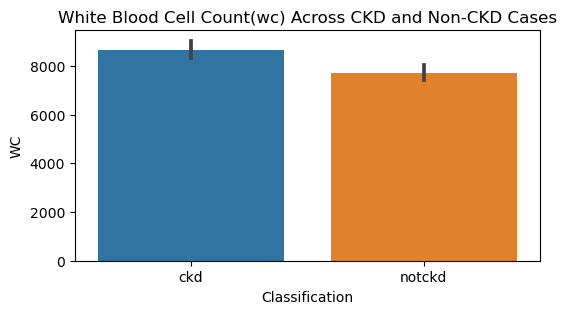

In [37]:
plt.figure(figsize=(6, 3))
sns.barplot(x='classification', y='wc', data=df)
plt.title("White Blood Cell Count(wc) Across CKD and Non-CKD Cases")
plt.xlabel('Classification')
plt.ylabel('WC')
plt.show()

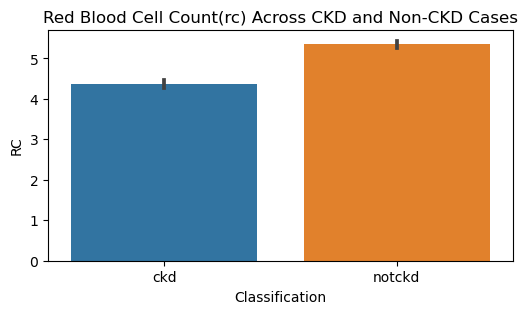

In [38]:
plt.figure(figsize=(6, 3))
sns.barplot(x='classification', y='rc', data=df)
plt.title("Red Blood Cell Count(rc) Across CKD and Non-CKD Cases")
plt.xlabel('Classification')
plt.ylabel('RC')
plt.show()

<Figure size 400x200 with 0 Axes>

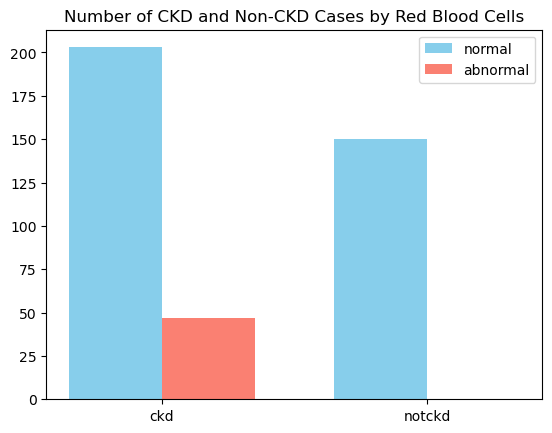

<Figure size 400x200 with 0 Axes>

In [39]:
# Create a crosstab between classification and rbc
df_rbc = pd.crosstab(df['classification'], df['rbc'])

# Extract labels and values
labels = df_rbc.index
normal_counts = df_rbc['normal']
abnormal_counts = df_rbc['abnormal']

# Define positions
x = np.arange(len(labels))
width = 0.35

# Create plot
plt.bar(x - width/2, normal_counts, width, label="normal", color="skyblue")
plt.bar(x + width/2, abnormal_counts, width, label="abnormal", color="salmon")

# Add labels

plt.title("Number of CKD and Non-CKD Cases by Red Blood Cells")
plt.xticks(x, labels)
plt.legend()
plt.figure(figsize=(4, 2))

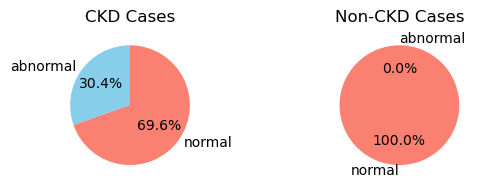

In [40]:
# Create a crosstab for classification vs Pus Cell
df_pc = pd.crosstab(df['classification'], df['pc'])

# Define labels and values for CKD and Non-CKD groups
labels = df_pc.columns  
ckd_values = df_pc.loc['ckd']
non_ckd_values = df_pc.loc['notckd']

# Create subplots for two pie charts
fig, axes = plt.subplots(1, 2, figsize=(6, 2))

# Pie chart for CKD cases
axes[0].pie(ckd_values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
axes[0].set_title('CKD Cases')

# Pie chart for Non-CKD cases
axes[1].pie(non_ckd_values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
axes[1].set_title('Non-CKD Cases')


# Show the plot
plt.tight_layout()
plt.show()

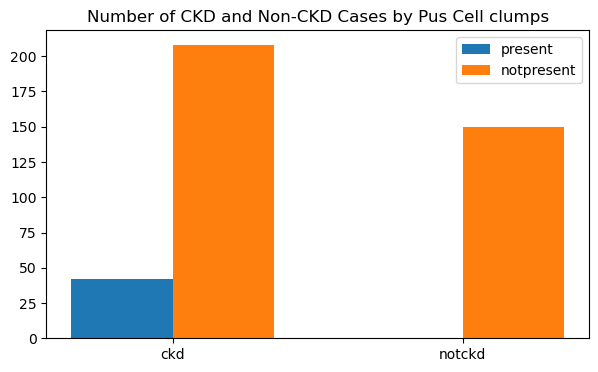

In [41]:
# Create a crosstab between classification and pcc
df_pcc = pd.crosstab(df['classification'], df['pcc'])

# Extract labels and values
labels = df_rbc.index
present_counts = df_pcc['present']
notpresent_counts = df_pcc['notpresent']

# Define positions
x = np.arange(len(labels))
width = 0.35

# Create plot
plt.figure(figsize=(7, 4))
plt.bar(x - width/2, present_counts, width, label="present")
plt.bar(x + width/2, notpresent_counts, width, label="notpresent")

# Add labels

plt.title("Number of CKD and Non-CKD Cases by Pus Cell clumps")
plt.xticks(x, labels)
plt.legend()


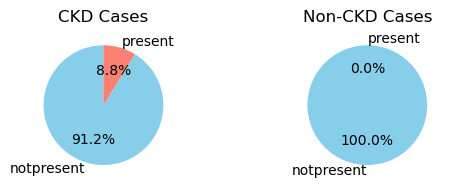

In [42]:
# Create a crosstab for classification vs Bacteria
df_ba = pd.crosstab(df['classification'], df['ba'])

# Define labels and values for CKD and Non-CKD groups
labels = df_ba.columns  
ckd_values = df_ba.loc['ckd']
non_ckd_values = df_ba.loc['notckd']

# Create subplots for two pie charts
fig, axes = plt.subplots(1, 2, figsize=(6, 2))

# Pie chart for CKD cases
axes[0].pie(ckd_values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
axes[0].set_title('CKD Cases')

# Pie chart for Non-CKD cases
axes[1].pie(non_ckd_values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
axes[1].set_title('Non-CKD Cases')

# Show the plot
plt.tight_layout()
plt.show()

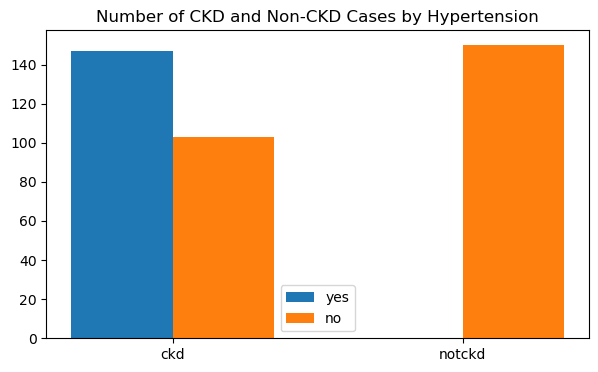

In [43]:
# Create a crosstab between classification and hypertension
df_htn = pd.crosstab(df['classification'], df['htn'])

# Extract labels and values
labels = df_htn.index
yes_counts = df_htn['yes']
no_counts = df_htn['no']

# Define positions
x = np.arange(len(labels))
width = 0.35

# Create plot
plt.figure(figsize=(7, 4))
plt.bar(x - width/2, yes_counts, width, label="yes")
plt.bar(x + width/2, no_counts, width, label="no")

# Add labels

plt.title("Number of CKD and Non-CKD Cases by Hypertension")
plt.xticks(x, labels)
plt.legend()

<Figure size 600x300 with 0 Axes>

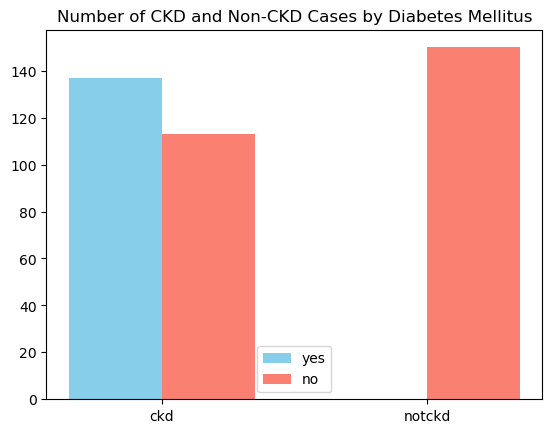

<Figure size 600x300 with 0 Axes>

In [44]:
# Create a crosstab between classification and Diabetes Mellitus
df_dm = pd.crosstab(df['classification'], df['dm'])

# Extract labels and values
labels = df_dm.index
yes_counts = df_dm['yes']
no_counts = df_dm['no']

# Define positions
x = np.arange(len(labels))
width = 0.35

# Create plot
plt.bar(x - width/2, yes_counts, width, label="yes", color="skyblue")
plt.bar(x + width/2, no_counts, width, label="no", color="salmon")

# Add labels

plt.title("Number of CKD and Non-CKD Cases by Diabetes Mellitus")
plt.xticks(x, labels)
plt.legend()
plt.figure(figsize=(6, 3))

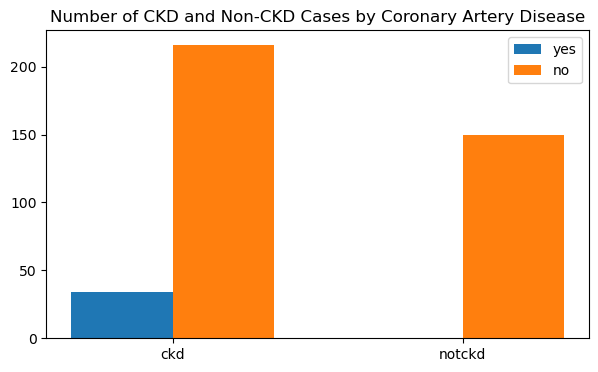

In [45]:
# Create a crosstab between classification and Coronary Artery Disease
df_cad = pd.crosstab(df['classification'], df['cad'])

# Extract labels and values
labels = df_cad.index
yes_counts = df_cad['yes']
no_counts = df_cad['no']

# Define positions
x = np.arange(len(labels))
width = 0.35

# Create plot
plt.figure(figsize=(7, 4))
plt.bar(x - width/2, yes_counts, width, label="yes")
plt.bar(x + width/2, no_counts, width, label="no")

# Add labels

plt.title("Number of CKD and Non-CKD Cases by Coronary Artery Disease")
plt.xticks(x, labels)
plt.legend()

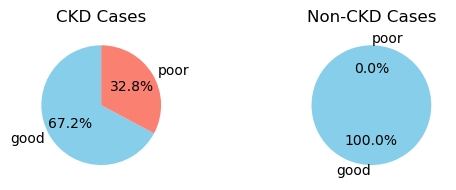

In [46]:
# Create a crosstab for classification vs Appetite
df_appet = pd.crosstab(df['classification'], df['appet'])

# Define labels and values for CKD and Non-CKD groups
labels = df_appet.columns  
ckd_values = df_appet.loc['ckd']
non_ckd_values = df_appet.loc['notckd']

# Create subplots for two pie charts
fig, axes = plt.subplots(1, 2, figsize=(6, 2))

# Pie chart for CKD cases
axes[0].pie(ckd_values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
axes[0].set_title('CKD Cases')

# Pie chart for Non-CKD cases
axes[1].pie(non_ckd_values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
axes[1].set_title('Non-CKD Cases')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 600x300 with 0 Axes>

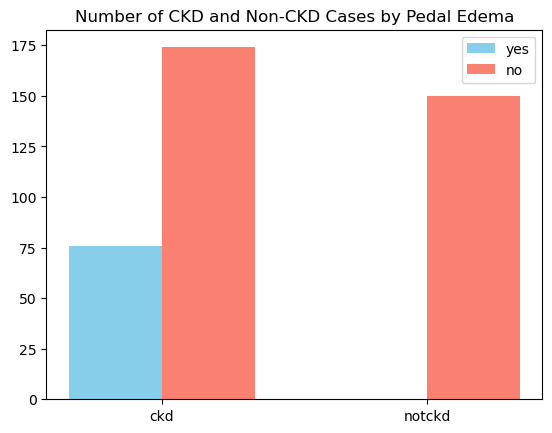

<Figure size 600x300 with 0 Axes>

In [47]:
# Create a crosstab between classification and Pedal Edema
df_pe = pd.crosstab(df['classification'], df['pe'])

# Extract labels and values
labels = df_pe.index
yes_counts = df_pe['yes']
no_counts = df_pe['no']

# Define positions
x = np.arange(len(labels))
width = 0.35

# Create plot
plt.bar(x - width/2, yes_counts, width, label="yes", color="skyblue")
plt.bar(x + width/2, no_counts, width, label="no", color="salmon")

# Add labels

plt.title("Number of CKD and Non-CKD Cases by Pedal Edema")
plt.xticks(x, labels)
plt.legend()
plt.figure(figsize=(6, 3))

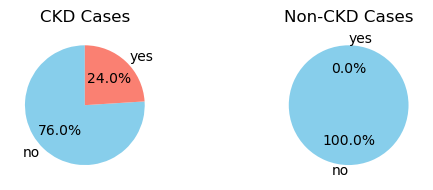

In [48]:
# Create a crosstab for classification vs Anemia
df_ane = pd.crosstab(df['classification'], df['ane'])

# Define labels and values for CKD and Non-CKD groups
labels = df_ane.columns  
ckd_values = df_ane.loc['ckd']
non_ckd_values = df_ane.loc['notckd']

# Create subplots for two pie charts
fig, axes = plt.subplots(1, 2, figsize=(6, 2))

# Pie chart for CKD cases
axes[0].pie(ckd_values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
axes[0].set_title('CKD Cases')

# Pie chart for Non-CKD cases
axes[1].pie(non_ckd_values, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
axes[1].set_title('Non-CKD Cases')

# Show the plot
plt.tight_layout()
plt.show()

## Feature selection & Multivariate Analysis

In [49]:
df[numerical_cols].corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
age,1.000000,0.136316,-0.160374,0.085918,0.186750,0.230731,0.194291,0.133985,-0.086040,0.049399,-0.178308,-0.212796,0.093794,-0.203199
bp,0.136316,1.000000,-0.166980,0.123518,0.189561,0.150180,0.180841,0.143184,-0.100705,0.063667,-0.279303,-0.289237,0.022177,-0.219317
sg,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,-0.299413,-0.244995,-0.171998,0.210791,-0.052935,0.490699,0.496434,-0.195068,0.432222
al,0.085918,0.123518,-0.479962,1.000000,0.287751,0.293150,0.347418,0.161310,-0.225612,0.107893,-0.474399,-0.473446,0.202920,-0.405092
su,0.186750,0.189561,-0.292053,0.287751,1.000000,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156807,-0.181285,0.156649,-0.161994
bgr,0.230731,0.150180,-0.299413,0.293150,0.627002,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254435,-0.258200,0.119881,-0.214094
bu,0.194291,0.180841,-0.244995,0.347418,0.126897,0.118859,1.000000,0.581517,-0.308806,0.339771,-0.541635,-0.523091,0.038362,-0.465243
sc,0.133985,0.143184,-0.171998,0.161310,0.096434,0.068886,0.581517,1.000000,-0.624036,0.204751,-0.342492,-0.338611,-0.010333,-0.321737
sod,-0.086040,-0.100705,0.210791,-0.225612,-0.051758,-0.130569,-0.308806,-0.624036,1.000000,0.069612,0.331483,0.343555,0.008010,0.313929
pot,0.049399,0.063667,-0.052935,0.107893,0.177396,0.052732,0.339771,0.204751,0.069612,1.000000,-0.096428,-0.117795,-0.075563,-0.118226


<Axes: >

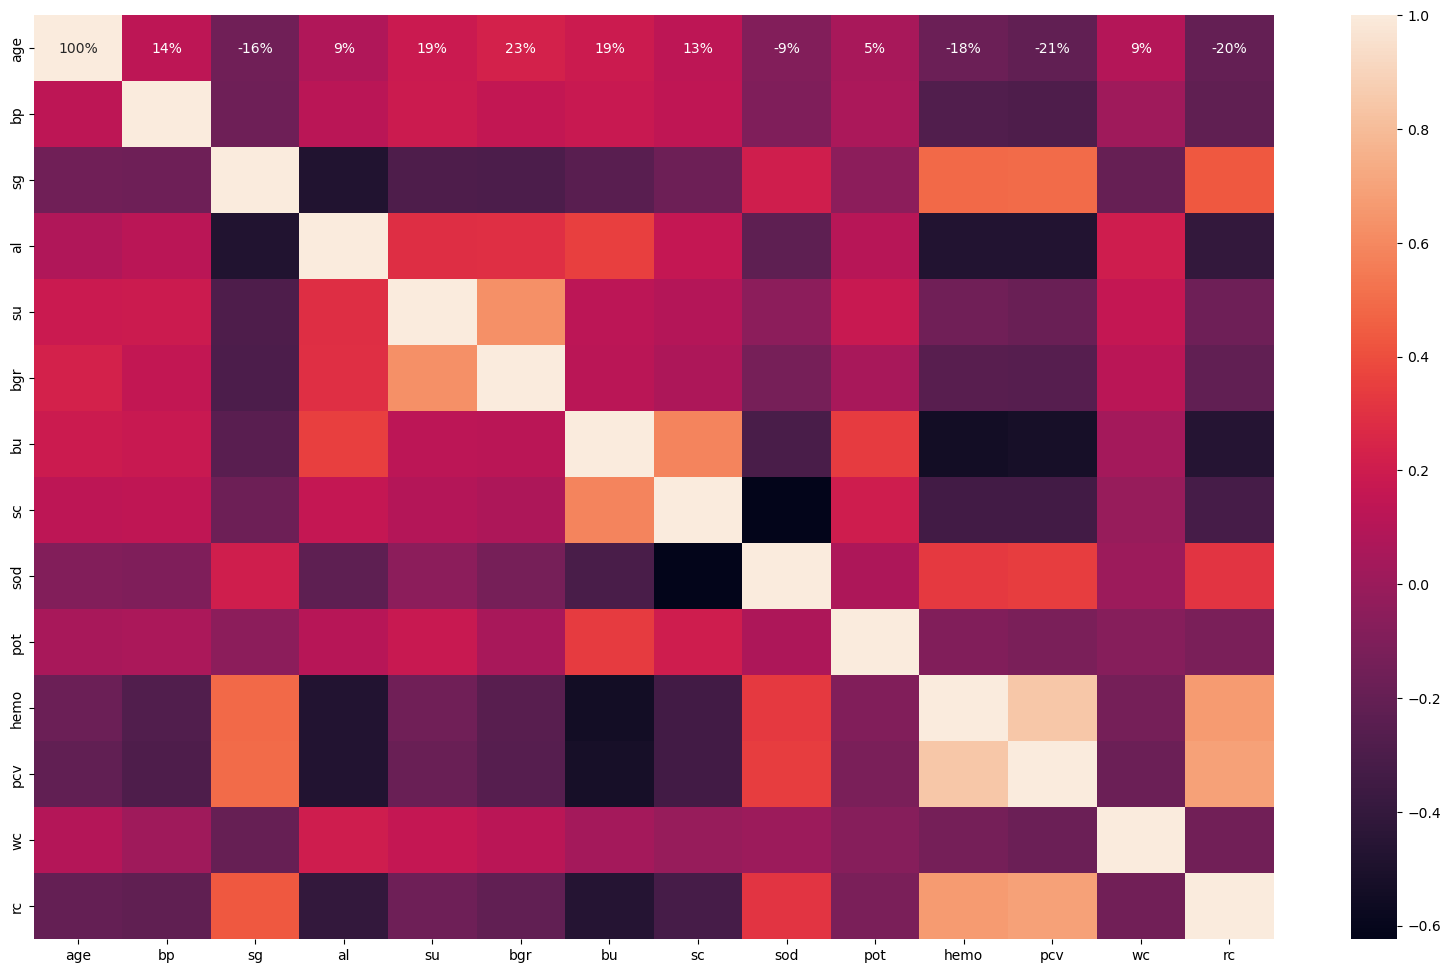

In [50]:
plt.figure(figsize=(20,12))
sns.heatmap(df[numerical_cols].corr(),annot=True,fmt='.0%')

In [51]:
# pcv and hemo (0.847490) so drop since multicollinearity
df=df.drop(columns=["pcv"])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,138.0,4.4,11.3,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,138.0,4.4,9.6,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,138.0,4.4,11.6,7300.0,4.6,no,no,no,good,no,no,ckd


## Imbalance data

In [52]:
df["classification"].unique()

array(['ckd', 'notckd'], dtype=object)

In [53]:
df["classification"].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [54]:
distribution = df['classification'].value_counts(normalize=True) * 100
print(distribution)

classification
ckd       62.5
notckd    37.5
Name: proportion, dtype: float64


## Encoding

### LabelEncoder

In [55]:
encoder = LabelEncoder()

# Encoding target column
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

# Encoding feature columns
df['rbc'] = encoder.fit_transform(df['rbc'])
df['pc'] = encoder.fit_transform(df['pc'])

df['pcc'] = encoder.fit_transform(df['pcc'])
df['ba'] = encoder.fit_transform(df['ba'])

df['htn'] = encoder.fit_transform(df['htn'])
df['dm'] = encoder.fit_transform(df['dm'])
df['cad'] = encoder.fit_transform(df['cad'])
df['pe'] = encoder.fit_transform(df['pe'])
df['ane'] = encoder.fit_transform(df['ane'])

df['appet'] = encoder.fit_transform(df['appet'])

In [56]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,7500.0,4.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,7300.0,4.6,0,0,0,0,0,0,1


In [57]:
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,6700.0,4.9,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,7800.0,6.2,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,6600.0,5.4,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,7200.0,5.9,0,0,0,0,0,0,0
399,58.0,80.0,1.025,0.0,0.0,1,1,0,0,131.0,18.0,1.1,141.0,3.5,15.8,6800.0,6.1,0,0,0,0,0,0,0


## Train test split

In [58]:
x = df.drop(columns=["classification"])
y = df["classification"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Smote

In [59]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

## Feature scaling

In [60]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Best Model Selection

### Logistic Regression

In [61]:
log = LogisticRegression(C=0.001)  

# Train the model
log.fit(x_train, y_train)
train_score = log.score(x_train, y_train)

# Pred
y_pred = log.predict(x_test)

print('Logitic Regression')
train_acc = log.score(x_train, y_train)
test_acc = log.score(x_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = log.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Logitic Regression
Train Accuracy: 0.9268
Test Accuracy: 0.9500

Confusion Matrix:
 [[28  0]
 [ 4 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.92      0.96        52

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80

AUC Score: 0.9986
Balanced Accuracy: 0.9615


In [62]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.75  0.825 0.9   0.9   0.75  0.9   0.85  0.9   0.85  0.875]
Mean CV Accuracy: 0.85


### Decision Tree Classifier

In [63]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_split=5)

# Train the model
dt.fit(x_train, y_train)

# Predictions
y_pred = dt.predict(x_test)

print('Decision Tree Classifier')
train_acc = dt.score(x_train, y_train)
test_acc = dt.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = dt.predict_proba(x_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Decision Tree Classifier
Train Accuracy: 0.9924
Test Accuracy: 1.0000
Confusion Matrix:
 [[28  0]
 [ 0 52]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

AUC Score: 1.0000
Balanced Accuracy: 1.0000


In [64]:
cv_scores = cross_val_score(dt, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.975 0.975 0.975 0.975 0.95  0.95  1.    1.    0.975 1.   ]
Mean CV Accuracy: 0.9775


### Random Forest Classifier

In [65]:
rf = RandomForestClassifier(n_estimators=35, max_depth=2, min_samples_split=10,random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Predictions
y_pred = rf.predict(x_test)


print('Random Forest Classifier')
train_acc = rf.score(x_train, y_train)
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Score: {train_acc:.4f}")
print(f"Test Score: {test_acc:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_probs = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC Score: {roc_auc:.4f}")

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

Random Forest Classifier
Train Score: 0.9924
Test Score: 0.9875
Confusion Matrix:
 [[28  0]
 [ 1 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

AUC-ROC Score: 1.0000
Balanced Accuracy: 0.9904


In [66]:
cv_scores = cross_val_score(rf, x, y, cv=10)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.975 0.975 0.975 1.    0.95  0.975 1.    1.    0.975 1.   ]
Mean CV Accuracy: 0.9824999999999999


## Manual Testing

In [67]:
input_data = (48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,1,1,0,1,0,0)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

print("The Person does not have Kidney Disease" if (prediction[0] == 0) else "The Person has Kidney Disease")


[1]
The Person has Kidney Disease


In [68]:
input_data = (55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,6700.0,4.9,0,0,0,0,0,0)
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

print("The Person does not have Kidney Disease" if (prediction[0] == 0) else "The Person has Kidney Disease")

[0]
The Person does not have Kidney Disease


## Save the model

In [69]:
import pickle
with open('k_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

## Open and use it

In [70]:
with open("k_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

In [71]:
y_pred = loaded_model.predict(input_data_reshaped)
print(y_pred)

[0]
